# Module M8 - Dimensionality Reduction

This material is adapted from the book Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow by Geron Aurelien.

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Dimensionality Reduction

### The problem

Many machine learning problems involve each training instance having thousands or millions of features.

This can make training very slow.

It can also make it more difficult to find a good solution.

This is often called the curse of dimensionality.

### Possible solutions

In many real-world problems, we can reduce the number of features without giving up much.

For example, in the MNIST images, the pixels around the edges are almost all white, so we could drop these.

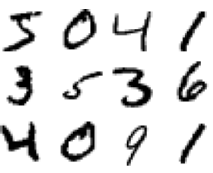

We might also notice that two neighboring pixels are often correrlated, so we could merge them by taking the mean pixel intensity value.

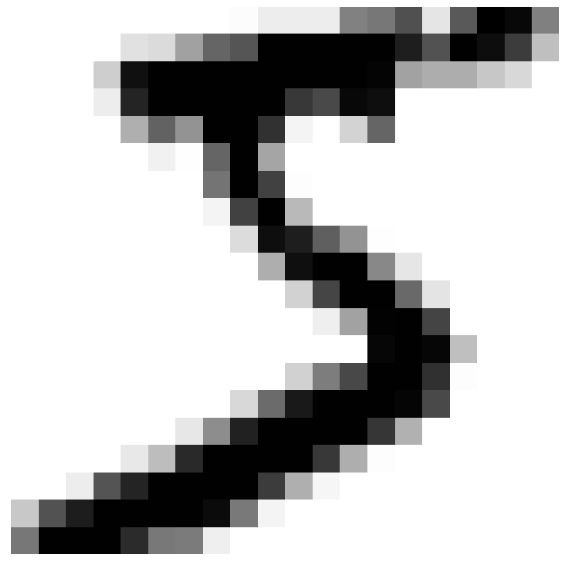

This type of dimensionality reduction can:

* speed up training

* help with data vizualization





# The Curse of Dimensionality

It is hard for us to visualize high-dimensional spaces.

Even a 4D hypercube can be hard to picture:

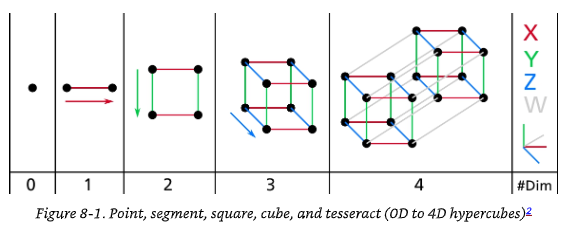

Now try to imagine a 200-dimensional ellipsoid bent into a 1,000-dimensional space!

### Things can be counter-intuitive in higer-dimensional space

First, imagine a 1x1 unit square -- a random point in this square will have about a 0.4% chance of being located less than 0.001 from a border.

In other words, it is unlikely that a random point will be "extreme" along any dimension.

But in a 10,000-dimensional unit hypercube, the probability is greater than 99.9999%.

Most points in a high-dimesional hypercube are very close to the border.

#### An example

To help understand this, let's look at an example.

Imagine that you divide each unit into 3 equal parts in a 1x1 unit square as shown on the left below.

There are 9 total regions.  Only the 1 region in the middle is not on a border.  So, the probability of being located on a border is 8/9 = 0.88


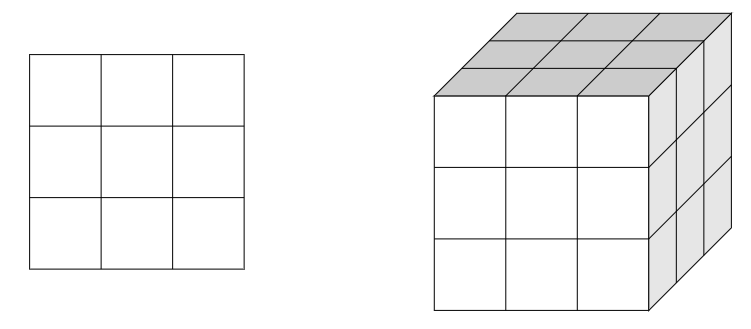


Now imagine the same scenario with a 1x1x1 unit cube in which each unit has been split into three equal parts as shown on the right.

There are 27 total regions.  Only the 1 region in the exact middle of the cube is not on a border.  So the probability of being located on a border is 26/27 = 0.96

### Higher-dimensional space

Another issue is that higher-dimension spaces have lots of space.

This means that data points in a high-dimension space may be very far away from each other.

For example:
* for two random points in a unit square the average distance between them will be about 0.52
* for two random points in a unit cube it will be about 0.66
* for two random points in a 1,000,000-dimensional hypercube it will be about 408.25

Because higher-dimensional spaces have so much space, datasets in those spaces may be very sparse.

In other words, the training instances may be very far away from each other.

This can make it more difficult to make accurate predictions.

One solution would be to increase the amount of training data.

However, this is not always feasbile -- the number of training instances to reach a given density increases exponentially with the number of dimensions!


#  Approaches for Dimensionality Reduction

We will look at two main approaches to reducing dimensionality:

* Projection
* Manifold learning

### Projection
In many real-world settings, training instances are not spread out uniformly across all dimensions.

Some features are constant and some are highly correlated.

As a result, often, training instances lie within (to close to) a lower-dimensional subspace of the higher-dimensional space.

#### Example:
In the figure below, the data points are in a 3-dimensional space.

However, we can notice that all the data points lie close to a plane.

This plane is a lower-dimensional (2D) subspace of the higher-dimensional (3D) space.

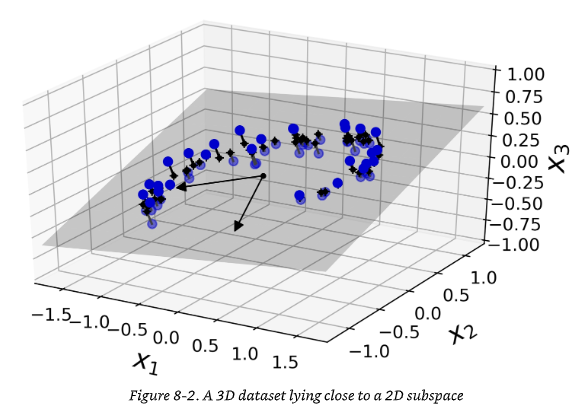

If we project every training instance perpendicularly onto this subspace (the short black lines), then we get a new 2D dataset shown below:

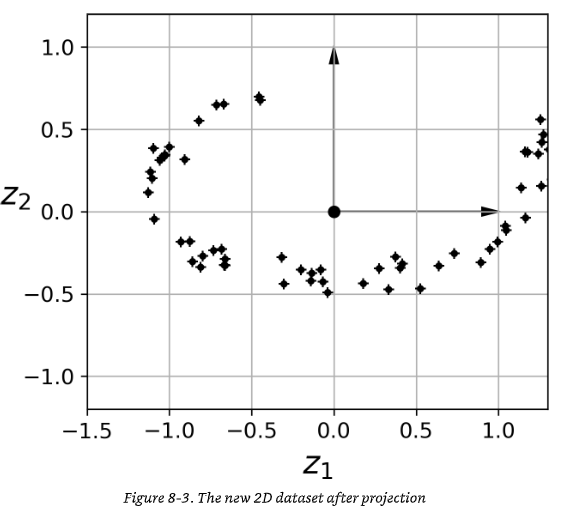

This is an example of reducing the dimensionality from 3D to 2D.

The axes in the 2D projection correspond to new features z1 and z2 that are the coordinates of the projection onto the plane.

### Manifold Learning

Some data is well-suited to projection.

However, in other cases, the subspace may twist and turn.

Consider for example the Swiss Roll toy dataset:

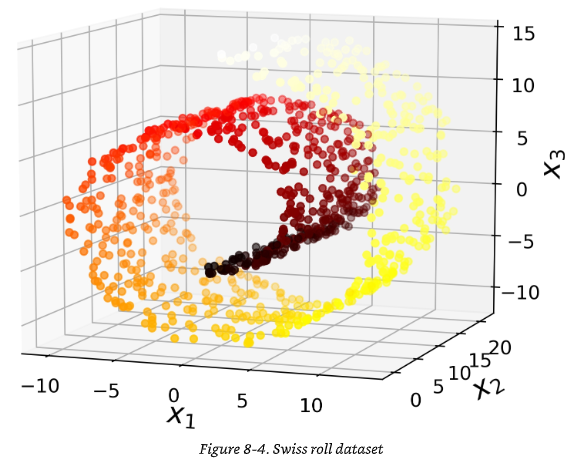

If we projected this data onto a plane (for example by dropping the x3 dimension), this would squash different layers of the Swiss roll together, as shown on the left side of the figure below

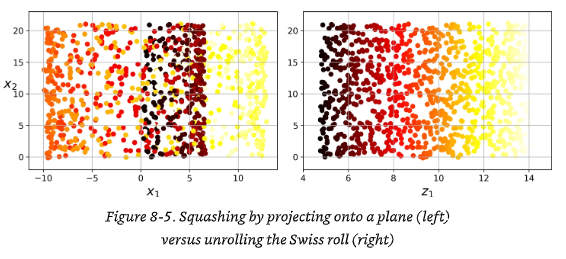

Instead, what we would like to do is to "unroll" the data to obtain the 2D data on the right side of the figure above.

The Swiss roll is an example of a 2D manifold.

A 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space.

Generally:
* a d-dimensional manifold
* is part of an n-dimensional space (where d<n)
* that locally resembles a d-dimensional hyperplane

For the Swiss roll example:
* d=2
* n=3
* it resembles a 2D plane, rolled into the third dimension

Manifold dimensionality reduction algorithms model the manifold on which the training instances lie (called Manifold Learning).

It relies on the manifold assumption -- that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.  This has been found to be true in many empirically observed cases.

#### MNIST
Consider the real-world MNIST dataset of handwritten digits from 0-9.

The images in this dataset have some similarities:
* they are all made of connected lines
* the borders are all white
* they are mostly centered

Imagine that you generated 26x26 images like the MNIST dataset, but did chose the intensity for each pixel completely at random.

Only a very few of these randomly generated images would look like digits.

In other words, the degrees of freedom available *if you try to create a digit image* are dramatically lower than the degrees of freedom *if you were allowed to generate any image you wanted*.

These constraints often lead to the data being representable in a lower-dimensional manifold.

#### Assumption
Another assumption that is often made (perhaps implicitly) is that the task will be simplier in the lower-dimensional space of the manifold.

However, this may not always be the case.

Consider the two examples below:

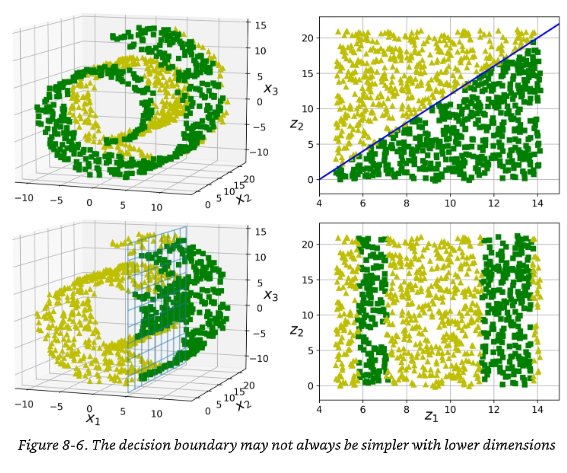

In the Swiss roll on the top-left, the decision boundary between yellow and green is complex, but becomes simplier if we unroll the manifold as shown on the top-right.

However, for the Swiss roll on the bottom-left, the decision boundary is very simple (it is at x1=5).  When the data is unrolled (bottom-right), the decision boundary becomes more complex.

#### Summary
* Reducing the dimensionality of your data will usually speed up training
* It may or may not lead to a better or simplier solution -- it depends on the data


# PCA

Principle Components Analysis (PCA) is a very common dimensionality reduction algorithm.

The idea is fairly simple:
* find the hyperplane that lies closest to the data
* project the data onto this hyperplane


#### Finding the right hyperplane
Consider the 2D dataset shown on the left-side of the figure below.

For a 2D dataset, we will be looking for a 1D hyperplane to project the data onto.

The figure shows three possible axes (1D hyperplanes):
* c1 - the solid line
* c2 - the dotted line
* the dashed line (not labelled)

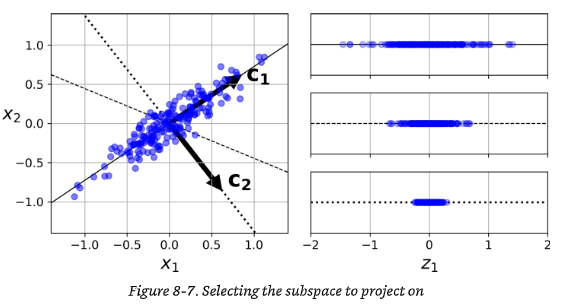

If we project the data:
* onto c1, a large amount of the variance in the data is preserved (see the top-right figure).
* onto c2, very little variance is preserved (see the bottom-right figure).
* onto the dashed line, some variance is preserved, but not as much as with c1 (see the middle-right figure).


For PCA, we want to select the axis that perserves the maximum amount of variance.

This is so that we lose the least amount of information.

We could also think of this as chosing the axis that minimizes the mean squared distance between the original data and the projection onto that axis.



### Principle Components
PCA finds the axis that accounts for the largest amount of variance in the dataset.

In the figure above, the line c1 is this axis.

PCA then finds a second axis, orthogonal to the first one, that accounts for the largest amount of the remaining variance.

In this 2D example, there is only one possibility: c2 is *the* axis orthogonal to c1.

However, if the example were a higher-dimensional dataset, PCA would look for a third axis (orthogonal to both previous axes), and would keep repeating this process for as many axes as dimensions in the dataset.

The i<sup>th</sup> axis is called the i<sup>th</sup> principle component.

#### Finding principle components
It is possible to find the principle components using a matrix factorization technique called Singular Value Decomposition (SVD).

We will not go into the mathematical details of SVD here, but more details are given in your textbook.



### Using scikit-learn

The code below will generate a 3D dataset similar to the one shown earlier:

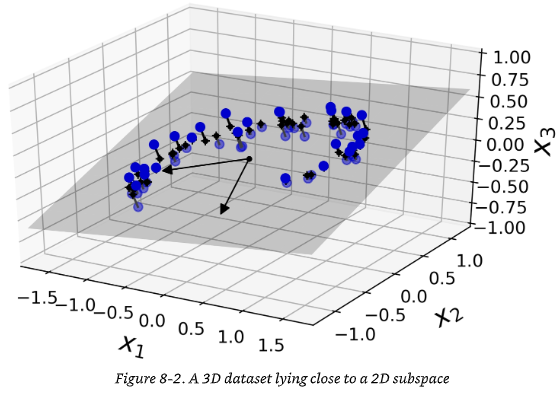


In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

We can use scikit-learn's decomposition PCA for this as shown in the code below.

The PCA transformer even takes care of centering the data for us.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

We can use PCA's inverse_transform() to try to recover the 3D points projected on the plane (PCA 2D subspace):

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

The projection step does lose information, so the recovered 3D points are not exactly equal to the original 3D points:
(np.allclose() checks to see if all the points in one array are close to the corresponding points in the second array)

In [ ]:
np.allclose(X3D_inv, X)

The reconstruction error is:

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

The `PCA` object gives access to the principal components that it computed.

Here, we see that it computed two components:

In [ ]:
pca.components_

## Explained Variance Ratio

For each principle component, scikit-learn computes the explained variance ratio for that component.

The ratio indicates how much of the dataset's variance is explained by each PC.

We can access this through the explained_variance_ratio_ variable of the pca object:

In [ ]:
pca.explained_variance_ratio_

Here, we see that the first dimension explains 84.2% of the variance, and the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance:

In [ ]:
1 - pca.explained_variance_ratio_.sum()

This helps us to understand that the third PC probably carries little information.

## Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, we could select a number of dimensions that adds up to a given portion of the variance (say, 95%).

For example, let's load up the MNIST dataset:

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

And partition it into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Remember that previously, we ran an SGD Classifier using the all the 784 features.

The performance was pretty good:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
X_train.shape

Next, we can perform PCA without actually reducing the dimensionality (e.g., pca.fit() rather than pca.fit_transform)

And look at the number of dimensions required to reach 95% of the training set's variance:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

Instead of this process, there is easier option.  If we set n_components to be a float between 0.0 and 1.0 to indicate the ratio of variance to preserve, then PCA will select the appropriate number of components and we can do the .fit_transform in one step:

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

In [ ]:
np.sum(pca.explained_variance_ratio_)

Another option is to plot the explained variance as a function of the number of dimensions.

There may be an "elbow" in the curve where the variance stops growing quickly.

For example, we could probably reduce the number of dimensions down to 100 without losing too much of the explained variance.

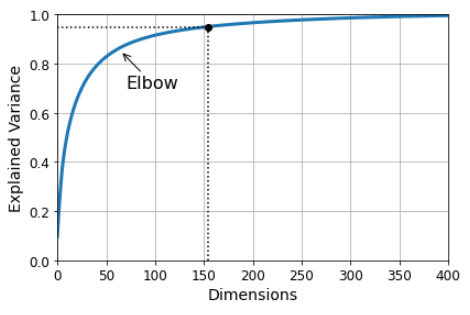


## Effects of PCA for Compression

In [ ]:
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

**Code to generate Figure 8–9. MNIST compression that preserves 95% of the variance:**

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


In [ ]:
X_reduced_pca = X_reduced

In [ ]:
X_reduced.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_reduced, y_train)
cross_val_score(sgd_clf, X_reduced, y_train, cv=3, scoring="accuracy")

## Randomized PCA

Computing the principle components can be computationally expensive, especially when there are a large number of features.

scikit-learn has stochastic algorithm that called Randomized PCA that can find an approximation of the first d priniciple components

Randomized PCA can be quite a bit faster than full SVD for certain situations.


In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)